# Predicting Employee Attrition rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
train = pd.read_csv(r"G:\hackerearth\Regression\Dataset\Train.csv")

In [3]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [4]:
train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

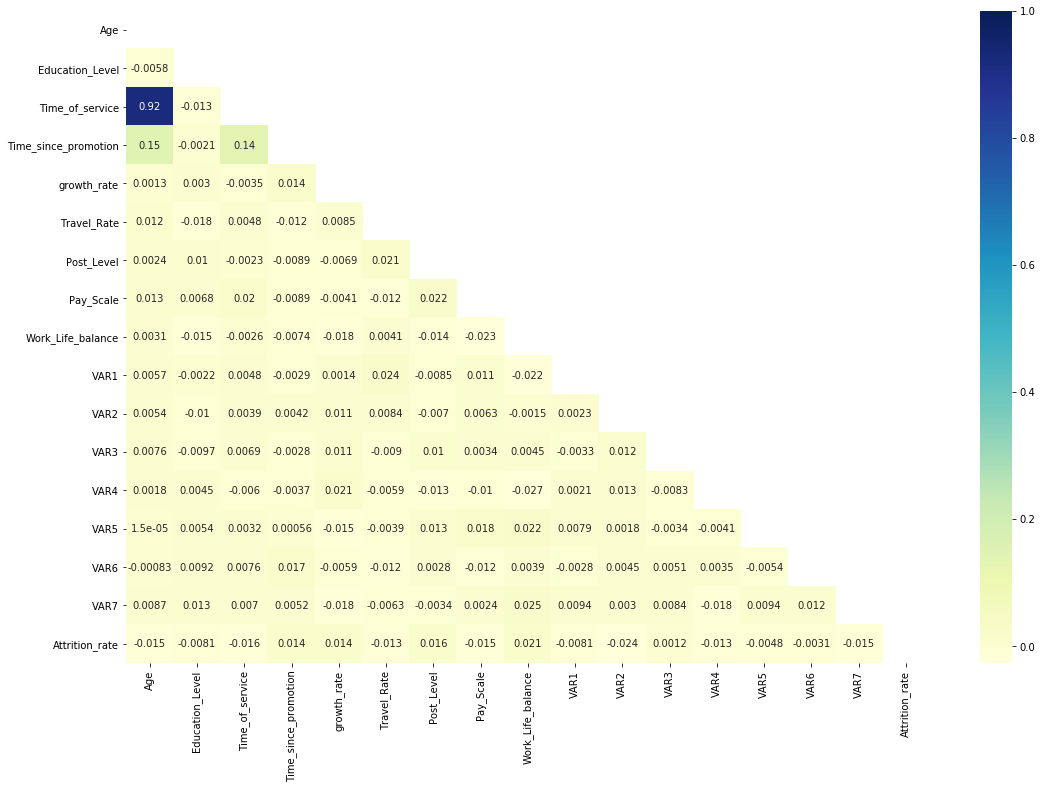

In [71]:
rel = train.corr()
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(rel, dtype=np.bool))
sns.heatmap(data=rel,annot=True,cmap='YlGnBu',mask=mask)
plt.savefig('Emp_heatmap.png')

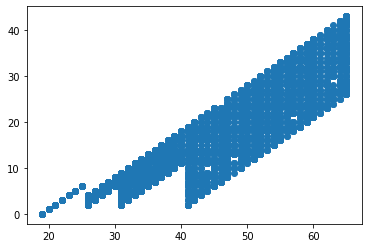

In [6]:
plt.scatter(x= train.Age,y= train.Time_of_service)
plt.show()

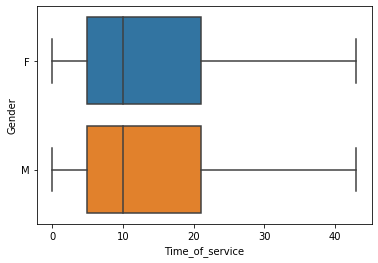

In [7]:
sns.boxplot(x = train["Time_of_service"],y=train["Gender"])
plt.show()

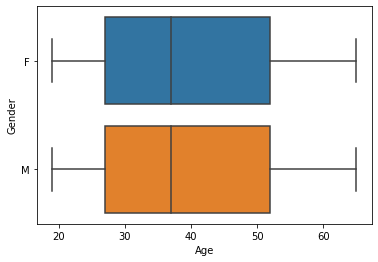

In [8]:
sns.boxplot(x = train["Age"],y=train["Gender"])
plt.show()

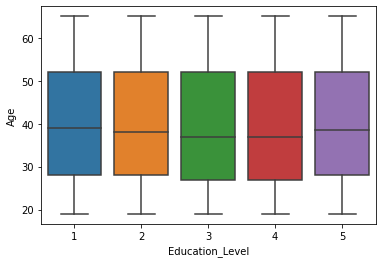

In [9]:
sns.boxplot(y = train["Age"],x=train["Education_Level"])
plt.show()

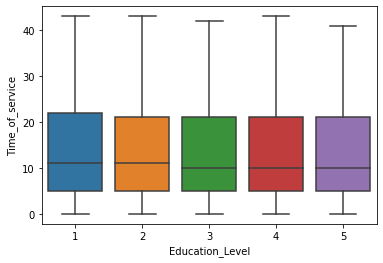

In [10]:
sns.boxplot(y = train["Time_of_service"],x=train["Education_Level"])
plt.show()

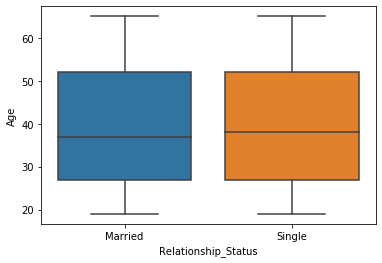

In [11]:
sns.boxplot(y = train["Age"],x=train["Relationship_Status"])
plt.show()

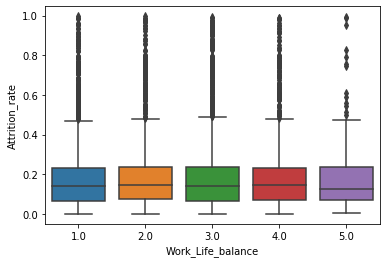

In [12]:
sns.boxplot(y = train["Attrition_rate"],x=train["Work_Life_balance"])
plt.show()

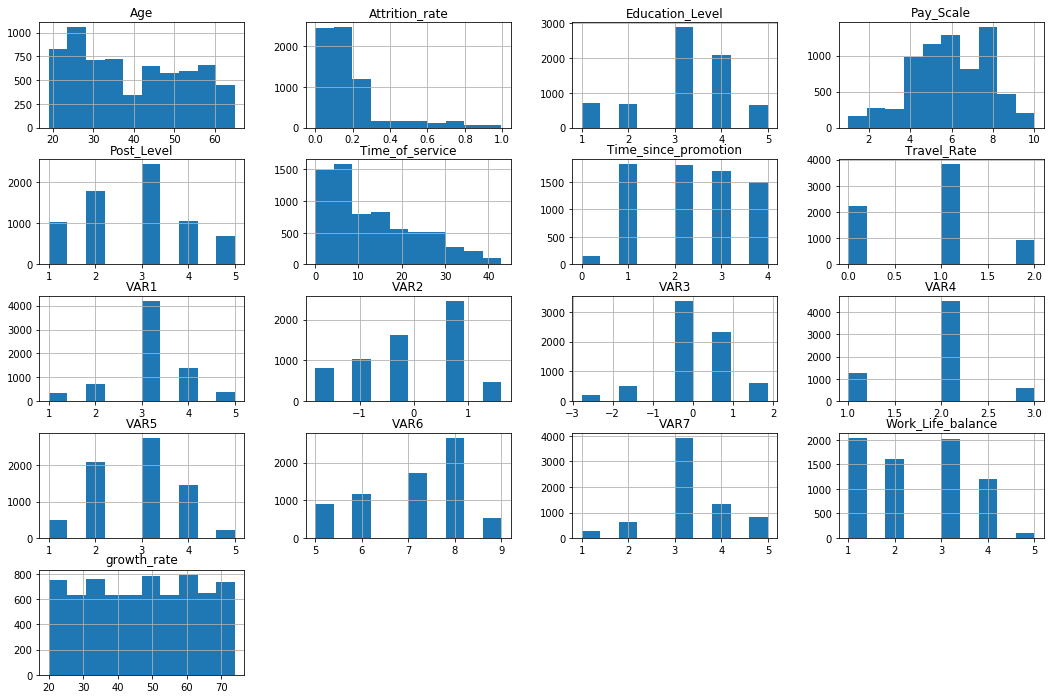

In [13]:
train.hist(figsize=(18,12))
plt.show()

In [14]:
empid = train.Employee_ID.str.extract('(\d+)')
rate = train['Attrition_rate']

In [15]:
d = pd.concat([empid,rate],axis=1)
d.rename(columns={0: "Emp","Attrition_rate" : "Attrition_rate"},inplace=True)
d.head()

,Emp,Attrition_rate
0,23371,0.1841
1,18000,0.0670
2,3891,0.0851
3,17492,0.0668
4,22534,0.1827


In [16]:
time = train['Time_of_service']
f = pd.concat([d,time],axis=1)

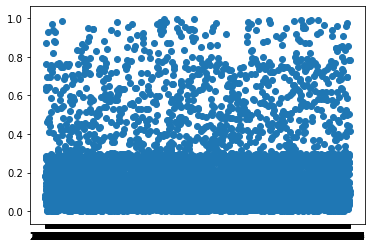

In [17]:
plt.scatter(x= d.Emp,y = d.Attrition_rate)

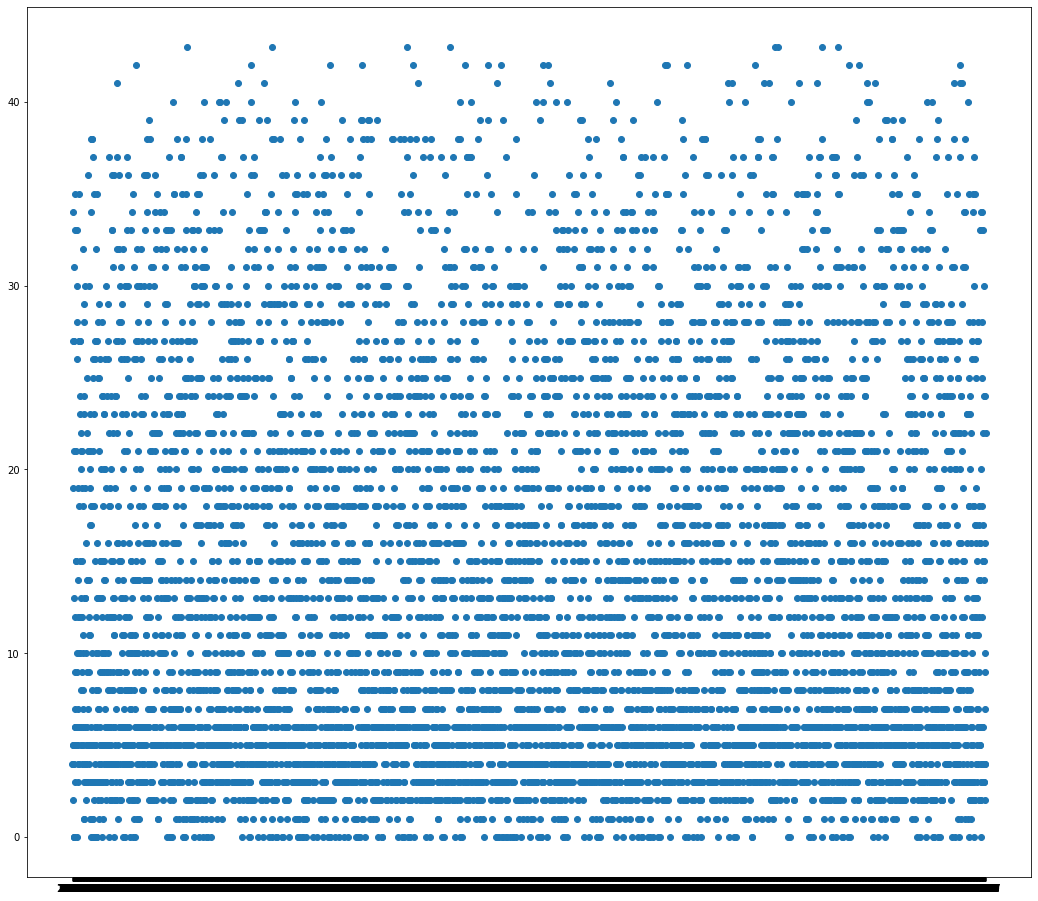

In [18]:
plt.figure(figsize=(18,16))
plt.scatter(x= f.Emp, y=f.Time_of_service)

In [19]:
train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


**EDA understanding**

* Age and Time of service are highly related with coefficient of 0.92
* Null age value can be predicted with Time of service
* All rest feature does not impact much so null values can be replaced with median

# Data preparation

**Features having null values**
* Age - Will be predicted via time of service
* Time of service will be replaced via median
* Work life balance will be placed via median
* VAR2 & VAR4 will be replaced via median
* Pay scale with medain

In [20]:
X = train.iloc[:,1:23]
Y = train.iloc[:,-1]

In [21]:
X['VAR2'].fillna(X['VAR2'].median(),inplace=True)

In [22]:
X['VAR4'].fillna(X['VAR4'].median(),inplace=True)

In [23]:
X['Pay_Scale'].fillna(X['Pay_Scale'].median(),inplace=True)

In [24]:
X['Work_Life_balance'].fillna(X['Work_Life_balance'].median(),inplace=True)

In [25]:
X['Time_of_service'].fillna(X['Time_of_service'].mean(),inplace=True)

In [26]:
train_na = X.dropna()
age_fit = np.polyfit(y= train_na.Age, x = train_na.Time_of_service, deg=1)

In [27]:
X.loc[(X["Age"].isnull() == True ),"Age"] = (age_fit[0] * X.loc[(X["Age"].isnull() == True )]["Time_of_service"] ) + age_fit[1]

In [28]:
X.isnull().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

**Treating Categorical features**

In [29]:
X.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [30]:
X.select_dtypes(include=['object']).head()

,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,F,Married,Franklin,IT,Conceptual,type2
1,M,Single,Springfield,Logistics,Analytical,type2
2,F,Married,Clinton,Quality,Conceptual,type2
3,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,F,Married,Springfield,Logistics,Conceptual,type3


In [31]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [32]:
data = pd.get_dummies(X,columns=['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'],drop_first=True)
data.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [33]:
from statsmodels.regression import linear_model

In [34]:
model = linear_model.OLS(Y,data).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Attrition_rate   R-squared (uncentered):                   0.510
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              181.1
Date:                Tue, 30 Jun 2020   Prob (F-statistic):                        0.00
Time:                        07:28:20   Log-Likelihood:                          1853.1
No. Observations:                7000   AIC:                                     -3626.
Df Residuals:                    6960   BIC:                                     -3352.
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                   0.0009      0.000      2.423      0.015       0.000       0.002
Education_Level                       0.0015      0.002      0.708      0.479      -0.003       0.005
Time_of_service                      -0.0014      0.001     -2.619      0.009      -0.002      -0.000
Time_since_promotion                  0.0042      0.002      2.151      0.032       0.000       0.008
growth_rate                           0.0004      0.000      2.650      0.008    9.54e-05       0.001
Travel_Rate                          -0.0019      0.003     -0.551      0.582      -0.009       0.005
Post_Level                            0.0049      0.002      2.563      0.010       0.001       0.009
Pay_Scale                             0.0002      0.001      0.201      0.841      -0.002       0.002
Work_Life_balance                     0.0058      0.002      2.931      0.003       0.002       0.010
VAR1                                  0.0033      0.003      1.273      0.203      -0.002       0.008
VAR2                                 -0.0043      0.002     -1.841      0.066      -0.009       0.000
VAR3                                  0.0002      0.002      0.100      0.920      -0.004       0.005
VAR4                                  0.0033      0.004      0.772      0.440      -0.005       0.012
VAR5                                  0.0024      0.002      1.019      0.308      -0.002       0.007
VAR6                                  0.0053      0.002      3.047      0.002       0.002       0.009
VAR7                                  0.0006      0.002      0.244      0.807      -0.004       0.005
Gender_M                              0.0133      0.005      2.938      0.003       0.004       0.022
Relationship_Status_Single            0.0045      0.005      0.955      0.340      -0.005       0.014
Hometown_Franklin                     0.0125      0.009      1.394      0.163      -0.005       0.030
Hometown_Lebanon                      0.0117      0.009      1.353      0.176      -0.005       0.029
Hometown_Springfield                  0.0188      0.009      2.124      0.034       0.001       0.036
Hometown_Washington                   0.0135      0.009      1.428      0.153      -0.005       0.032
Unit_Human Resource Management        0.0133      0.013      1.031      0.303      -0.012       0.039
Unit_IT                               0.0096      0.009      1.018      0.309      -0.009       0.028
Unit_Logistics                        0.0133      0.010      1.367      0.172      -0.006       0.032
Unit_Marketing                        0.0206      0.015      1.358      0.175      -0.009       0.050
Unit_Operarions           

In [36]:
from sklearn.preprocessing import PolynomialFeatures

x_inter = PolynomialFeatures(2,interaction_only=True,include_bias=False).fit_transform(data.iloc[:,:16])

In [37]:
inter_df = pd.DataFrame(x_inter,columns=['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion','growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
                                        'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6','VAR7',
                                        'Age:Education_Level','Age:Time_of_service','Age:Time_since_promotion','Age:growth_rate','Age:Travel_Rate','Age:Post_Level','Age:Pay_Scale',
                                        'Age:Work_Life_balance','Age:VAR1','Age:VAR2','Age:VAR3','Age:VAR4','Age:VAR5','Age:VAR6','Age:VAR7',
                                        'Education_Level:Time_of_service','Education_Level:Time_since_promotion','Education_Level:growth_rate','Education_Level:Travel_Rate','Education_Level:Post_Level','Education_Level:Pay_Scale',
                                        'Education_Level:Work_Life_balance','Education_Level:VAR1','Education_Level:VAR2','Education_Level:VAR3','Education_Level:VAR4','Education_Level:VAR5','Education_Level:VAR6','Education_Level:VAR7',
                                        'Time_of_service:Time_since_promotion','Time_of_service:growth_rate','Time_of_service:Travel_Rate','Time_of_service:Post_Level','Time_of_service:Pay_Scale',
                                        'Time_of_service:Work_Life_balance','Time_of_service:VAR1','Time_of_service:VAR2','Time_of_service:VAR3','Time_of_service:VAR4','Time_of_service:VAR5','Time_of_service:VAR6','Time_of_service:VAR7',
                                        'Time_since_promotion:growth_rate','Time_since_promotion:Travel_Rate','Time_since_promotion:Post_Level','Time_since_promotion:Pay_Scale',
                                        'Time_since_promotion:Work_Life_balance','Time_since_promotion:VAR1','Time_since_promotion:VAR2','Time_since_promotion:VAR3','Time_since_promotion:VAR4','Time_since_promotion:VAR5','Time_since_promotion:VAR6','Time_since_promotion:VAR7',
                                        'growth_rate:Travel_Rate','growth_rate:Post_Level','growth_rate:Pay_Scale',
                                        'growth_rate:Work_Life_balance','growth_rate:VAR1','growth_rate:VAR2','growth_rate:VAR3','growth_rate:VAR4','growth_rate:VAR5','growth_rate:VAR6','growth_rate:VAR7',
                                        'Travel_Rate:Post_Level','Travel_Rate:Pay_Scale',
                                        'Travel_Rate:Work_Life_balance','Travel_Rate:VAR1','Travel_Rate:VAR2','Travel_Rate:VAR3','Travel_Rate:VAR4','Travel_Rate:VAR5','Travel_Rate:VAR6','Travel_Rate:VAR7',
                                        'Post_Level:Pay_Scale',
                                        'Post_Level:Work_Life_balance','Post_Level:VAR1','Post_Level:VAR2','Post_Level:VAR3','Post_Level:VAR4','Post_Level:VAR5','Post_Level:VAR6','Post_Level:VAR7',
                                        'Pay_Scale:Work_Life_balance','Pay_Scale:VAR1','Pay_Scale:VAR2','Pay_Scale:VAR3','Pay_Scale:VAR4','Pay_Scale:VAR5','Pay_Scale:VAR6','Pay_Scale:VAR7',
                                        'Work_Life_balance:VAR1','Work_Life_balance:VAR2','Work_Life_balance:VAR3','Work_Life_balance:VAR4','Work_Life_balance:VAR5','Work_Life_balance:VAR6','Work_Life_balance:VAR7',
                                        'VAR1:VAR2','VAR1:VAR3','VAR1:VAR4','VAR1:VAR5','VAR1:VAR6','VAR1:VAR7',
                                        'VAR2:VAR3','VAR2:VAR4','VAR2:VAR5','VAR2:VAR6','VAR2:VAR7',
                                        'VAR3:VAR4','VAR3:VAR5','VAR3:VAR6','VAR3:VAR7',
                                        'VAR4:VAR5','VAR4:VAR6','VAR4:VAR7',
                                        'VAR5:VAR6','VAR5:VAR7',
                                        'VAR6:VAR7'])

In [38]:
inter_model = linear_model.OLS(Y,inter_df).fit()

In [39]:
inter_model.pvalues[inter_model.pvalues < 0.05]

VAR1:VAR7    0.023755
VAR2:VAR6    0.015654
dtype: float64

In [40]:
data['VAR1_7'] = data['VAR1'] * data['VAR7']
data['VAR2_6'] = data['VAR2'] * data['VAR6']
data.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_7,VAR2_6
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,12,3.7580
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,-4.8060
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,12,-7.6896
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,9,-12.7232
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,6.0128


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,Y,test_size=0.3,random_state=42)

**Starting with basics**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import RidgeCV

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [43]:
def Regression_model_report(x_train,x_test,y_train,y_test):
    algo = []
    algo.append(("AdaBoost ",AdaBoostRegressor()))
    algo.append(("Bagging  ",BaggingRegressor()))
    algo.append(("Extra Tree  ",ExtraTreesRegressor()))
    algo.append(("Random Forest ",RandomForestRegressor()))
    algo.append(("Gradient Bossting ",GradientBoostingRegressor()))
    algo.append(("MLP neuron ",MLPRegressor()))
    algo.append(("Gaussian Process ",GaussianProcessRegressor()))
    algo.append(("Linear Reg ",LinearRegression()))
    algo.append(("Ridge Reg ",Ridge()))
    algo.append(("SGD Reg ",SGDRegressor()))
    algo.append(("Ridge CV " , RidgeCV()))
    
    names = []
    test_rmse = []
    train_rmse = []
    train_r2 = []
    test_r2 = []
    
    for name, regressor in algo:
        regressor.fit(x_train,y_train)
        train_score = 100* max(0, 1- mean_squared_error(y_train,regressor.predict(x_train),squared=True))
        train_rmse.append(train_score)
        test_score = 100* max(0, 1- mean_squared_error(y_test,regressor.predict(x_test),squared=True))
        test_rmse.append(test_score)
        train_r2.append(r2_score(y_train,regressor.predict(x_train)))
        test_r2.append(r2_score(y_test,regressor.predict(x_test)))
        names.append(name)
        
    reg_report = pd.DataFrame({"Algorithms": names,"Train_RMSE": train_rmse,"Test_RMSE": test_rmse,"Train_R2": train_r2,"Test_R2": train_r2})
    return reg_report


In [44]:
report = Regression_model_report(x_train,x_test,y_train,y_test)

In [45]:
report.sort_values(by=['Test_RMSE'],ascending=False)

,Algorithms,Train_RMSE,Test_RMSE,Train_R2,Test_R2
10,Ridge CV,96.663070,96.364184,1.202425e-02,1.202425e-02
8,Ridge Reg,96.663486,96.359459,1.214760e-02,1.214760e-02
7,Linear Reg,96.663493,96.358759,1.214964e-02,1.214964e-02
4,Gradient Bossting,97.006018,96.329693,1.135620e-01,1.135620e-01
3,Random Forest,99.509096,96.239225,8.546564e-01,8.546564e-01
2,Extra Tree,100.000000,96.098682,1.000000e+00,1.000000e+00
1,Bagging,99.284097,95.961302,7.880403e-01,7.880403e-01
5,MLP neuron,96.554799,95.561488,-2.003162e-02,-2.003162e-02
0,AdaBoost,95.848468,95.556690,-2.291576e-01,-2.291576e-01
6,Gaussian Process,100.000000,92.693454,1.000000e+00,1.000000e+00


# Final Prediction

In [46]:
test = pd.read_csv(r"G:\hackerearth\Regression\Dataset\Test.csv")

In [47]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [48]:
t1 = pd.get_dummies(test,columns=['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'],drop_first=True)
t1.head()

,Employee_ID,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,EID_22713,32.0,5,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,EID_9658,65.0,2,41.0,2,72,1,1,1.0,1.0,4,-0.9612,0.7075,1.0,2,8,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,EID_22203,52.0,3,21.0,3,25,0,1,8.0,1.0,4,-0.1048,0.7075,2.0,1,9,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,EID_7652,50.0,5,11.0,4,28,1,1,2.0,4.0,3,-0.1048,0.7075,2.0,2,8,3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,EID_6516,44.0,3,12.0,4,47,1,3,2.0,4.0,4,1.6081,0.7075,2.0,2,7,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [49]:
val = t1.iloc[:,1:]
val.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,65.0,2,41.0,2,72,1,1,1.0,1.0,4,-0.9612,0.7075,1.0,2,8,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,52.0,3,21.0,3,25,0,1,8.0,1.0,4,-0.1048,0.7075,2.0,1,9,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,50.0,5,11.0,4,28,1,1,2.0,4.0,3,-0.1048,0.7075,2.0,2,8,3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,44.0,3,12.0,4,47,1,3,2.0,4.0,4,1.6081,0.7075,2.0,2,7,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [50]:
val.isnull().sum()

Age                                  161
Education_Level                        0
Time_of_service                       52
Time_since_promotion                   0
growth_rate                            0
Travel_Rate                            0
Post_Level                             0
Pay_Scale                              3
Work_Life_balance                      5
VAR1                                   0
VAR2                                 217
VAR3                                   0
VAR4                                 298
VAR5                                   0
VAR6                                   0
VAR7                                   0
Gender_M                               0
Relationship_Status_Single             0
Hometown_Franklin                      0
Hometown_Lebanon                       0
Hometown_Springfield                   0
Hometown_Washington                    0
Unit_Human Resource Management         0
Unit_IT                                0
Unit_Logistics  

**Transformation on Test final data**

In [51]:
val['VAR2'].fillna(X['VAR2'].median(),inplace=True)

In [52]:
val['VAR4'].fillna(X['VAR4'].median(),inplace=True)

In [53]:
val['Pay_Scale'].fillna(X['Pay_Scale'].median(),inplace=True)

In [54]:
val['Work_Life_balance'].fillna(X['Work_Life_balance'].median(),inplace=True)

In [55]:
val['Time_of_service'].fillna(X['Time_of_service'].median(),inplace=True)

In [56]:
val.loc[(val["Age"].isnull() == True ),"Age"] = (age_fit[0] * val.loc[(val["Age"].isnull() == True )]["Time_of_service"] ) + age_fit[1]

In [57]:
val.isnull().sum()

Age                                  0
Education_Level                      0
Time_of_service                      0
Time_since_promotion                 0
growth_rate                          0
Travel_Rate                          0
Post_Level                           0
Pay_Scale                            0
Work_Life_balance                    0
VAR1                                 0
VAR2                                 0
VAR3                                 0
VAR4                                 0
VAR5                                 0
VAR6                                 0
VAR7                                 0
Gender_M                             0
Relationship_Status_Single           0
Hometown_Franklin                    0
Hometown_Lebanon                     0
Hometown_Springfield                 0
Hometown_Washington                  0
Unit_Human Resource Management       0
Unit_IT                              0
Unit_Logistics                       0
Unit_Marketing           

In [58]:
val['VAR1_7'] = val['VAR1'] * val['VAR7']
val['VAR2_6'] = val['VAR2'] * val['VAR6']
val.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,VAR1_7,VAR2_6
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,12,-7.6896
1,65.0,2,41.0,2,72,1,1,1.0,1.0,4,-0.9612,0.7075,1.0,2,8,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,8,-7.6896
2,52.0,3,21.0,3,25,0,1,8.0,1.0,4,-0.1048,0.7075,2.0,1,9,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,12,-0.9432
3,50.0,5,11.0,4,28,1,1,2.0,4.0,3,-0.1048,0.7075,2.0,2,8,3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-0.8384
4,44.0,3,12.0,4,47,1,3,2.0,4.0,4,1.6081,0.7075,2.0,2,7,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,16,11.2567


In [59]:
reg = LinearRegression()
reg.fit(x_train,y_train)
prediction = reg.predict(val)

In [60]:
p = pd.DataFrame(prediction)

In [61]:
results = pd.concat([t1.iloc[:,0],p],axis = 1)

In [62]:
results.rename(columns={"Employee_ID": "Employee_ID",0 : "Attrition_rate"},inplace=True)

In [63]:
results.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.192504
1,EID_9658,0.195531
2,EID_22203,0.188710
3,EID_7652,0.235321
4,EID_6516,0.183934


In [64]:
results.to_csv(r"G:\hackerearth\Regression\Dataset\submit20.csv",index=False)

In [65]:
reg = Ridge()
reg.fit(x_train,y_train)
prediction = reg.predict(val)

In [66]:
p = pd.DataFrame(prediction)
results = pd.concat([t1.iloc[:,0],p],axis = 1)
results.rename(columns={"Employee_ID": "Employee_ID",0 : "Attrition_rate"},inplace=True)
results.to_csv(r"G:\hackerearth\Regression\Dataset\submit21.csv",index=False)

In [67]:

reg = RidgeCV()
reg.fit(x_train,y_train)
prediction = reg.predict(val)

In [68]:
p = pd.DataFrame(prediction)
results = pd.concat([t1.iloc[:,0],p],axis = 1)
results.rename(columns={"Employee_ID": "Employee_ID",0 : "Attrition_rate"},inplace=True)
results.to_csv(r"G:\hackerearth\Regression\Dataset\submit22.csv",index=False)

# Thank You !!